#Day9. 데이터분석 개론

---



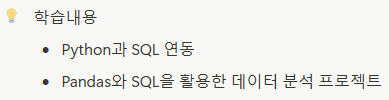

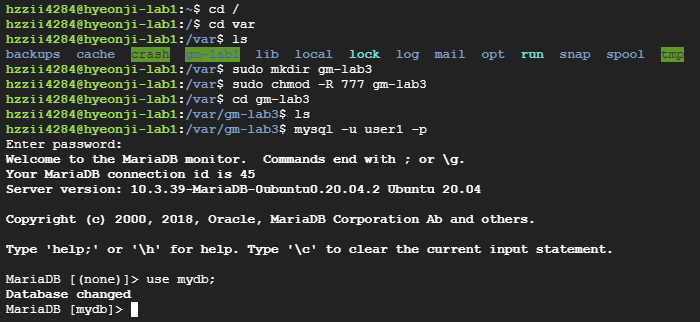

##**ALTER TABLE**

MariaDB에서 기존 테이블의 구조 변경하는 데 사용 (열 추가, 삭제, 수정, 인덱스 추가, 제약 조건 변경 등)

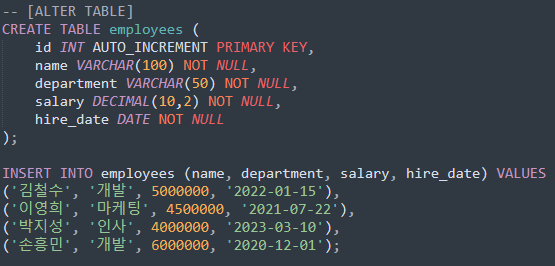
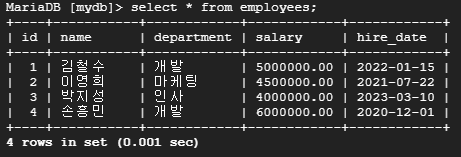

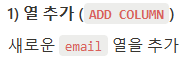

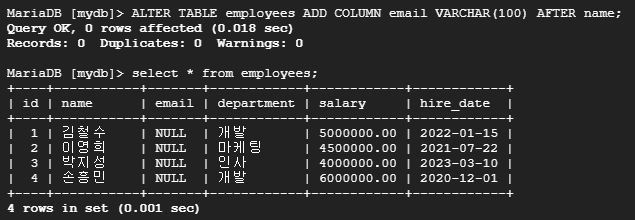

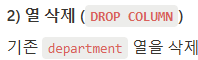

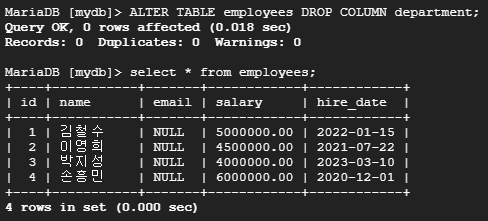

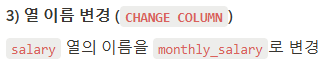

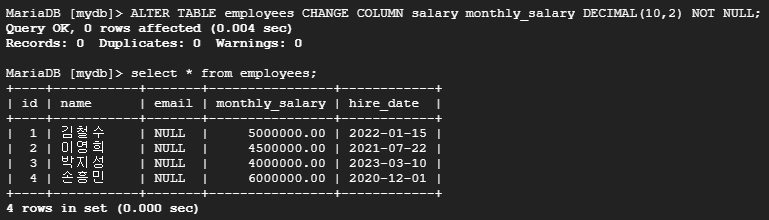

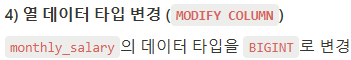

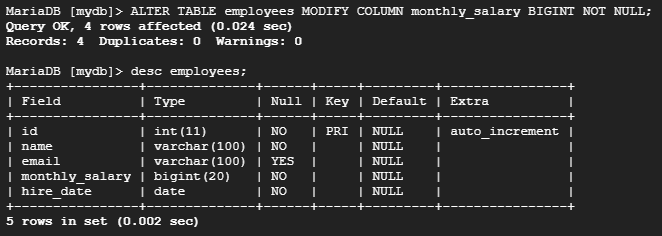

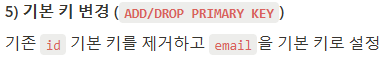

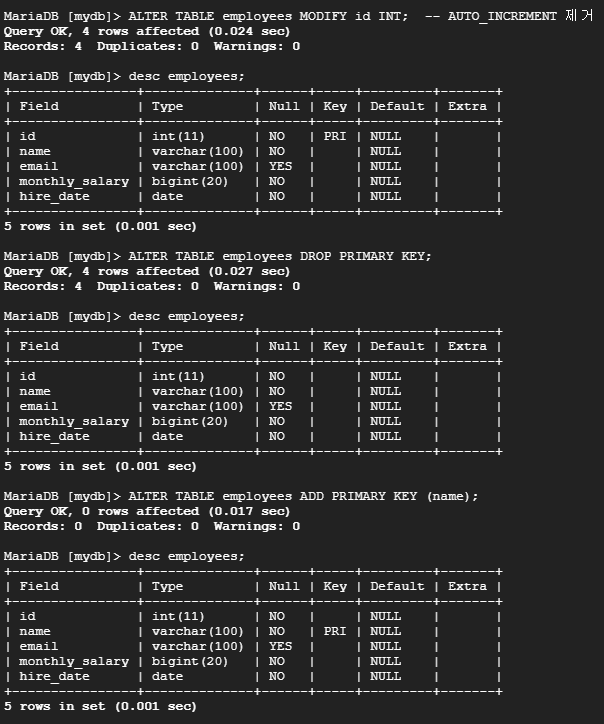

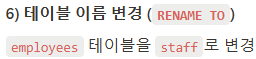

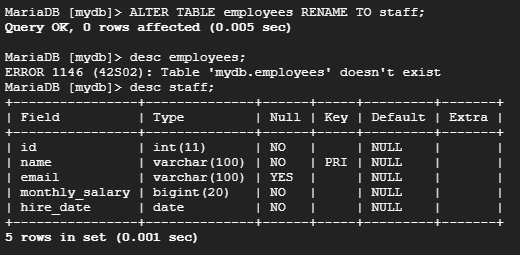

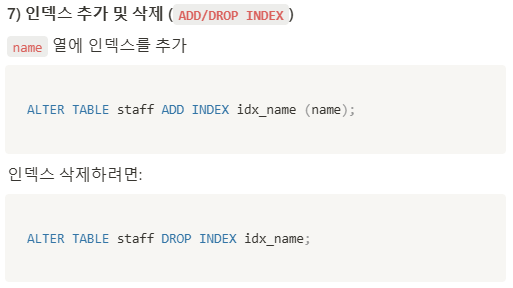



---

###**연습 문제**

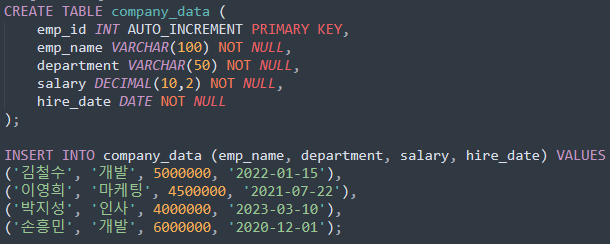  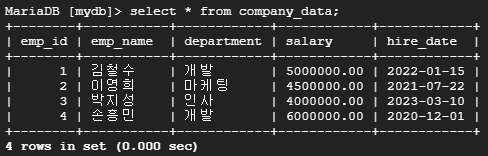

#### **1) email 열 추가, 데이터 타입 VARCHAR(100)으로 설정**

> 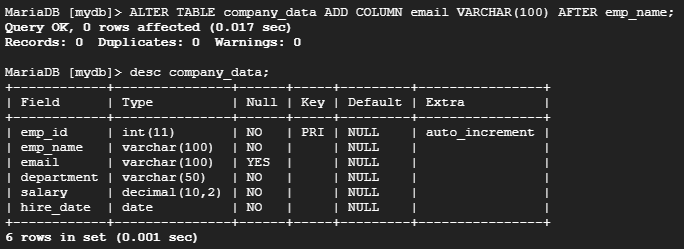





####**2) department 열 삭제**

> 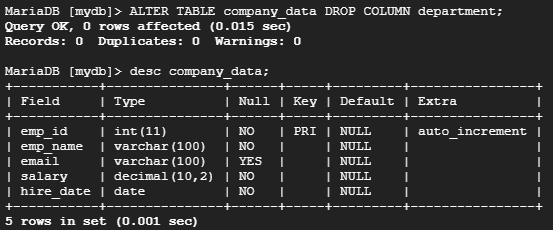



####**3) salary 열의 이름을 monthly_salary로 변경**

> 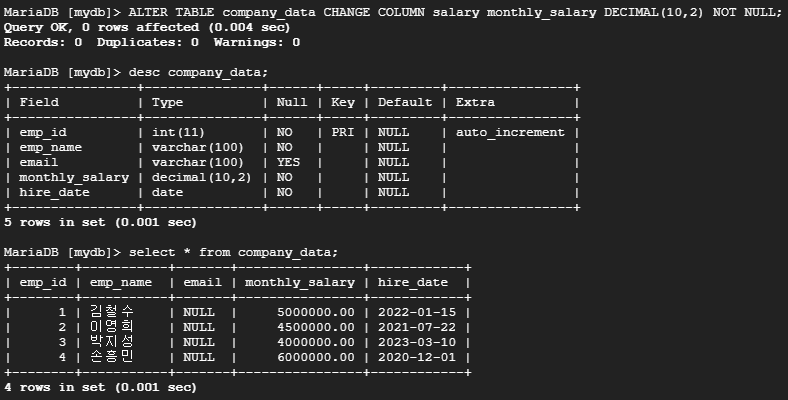



####**4) monthly_salary 열의 데이터 타입 BIGINT로 변경**

> 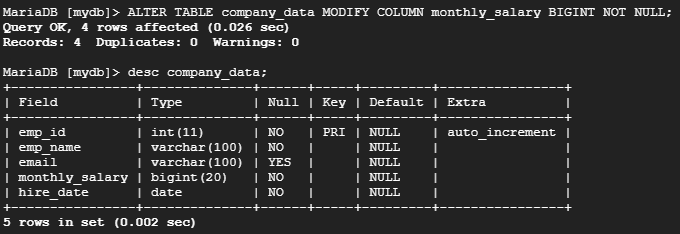



####**5) company_data 테이블의 이름을 staff_info로 변경**

> 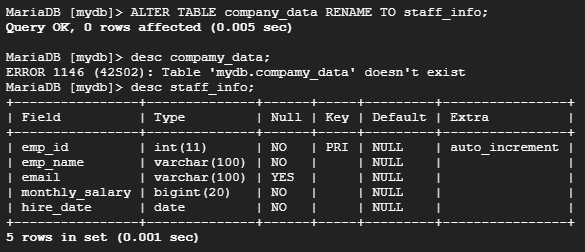



####**6) emp_name 열의 데이터 타입 VARCHAR(150)으로 변경**
> 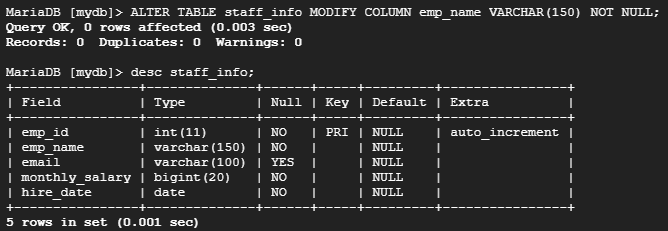

####**7) hire_date 열의 기본값을 CURRENT_DATE로 설정**
> 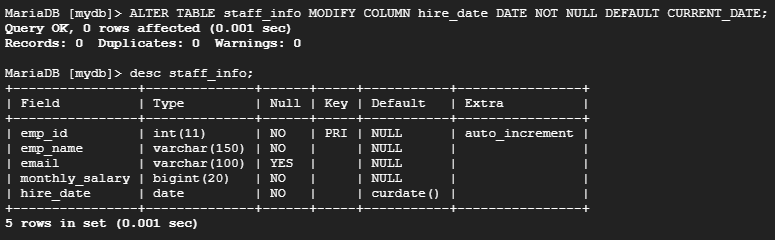

####**8) emp_id 열의 AUTO_INCREMENT 속성 제거**
> 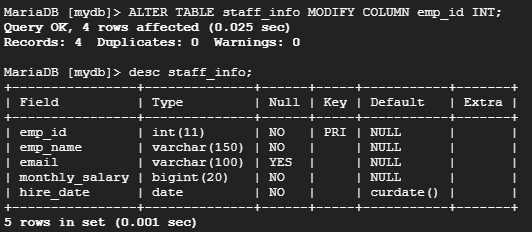

####**9) emp_name 열에 UNIQUE 제약 조건 추가**
> 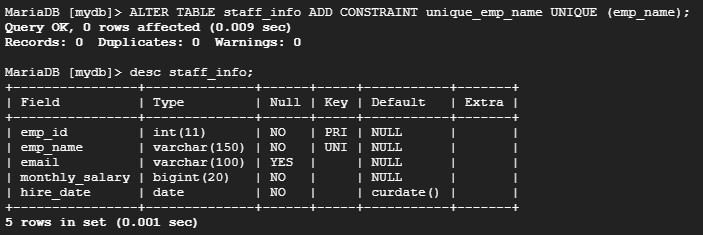

####**10) monthly_salary 열에 CHECK 제약 조건 추가하여 급여 3000000 이상 조건 설정**
> 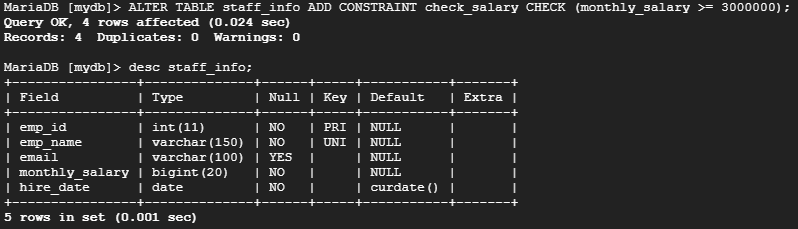



---

##**Python & SQL 연동**

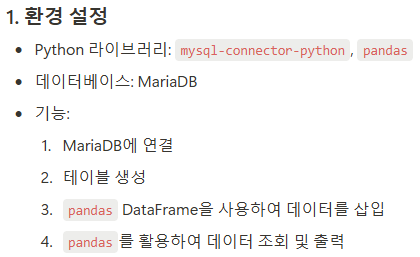

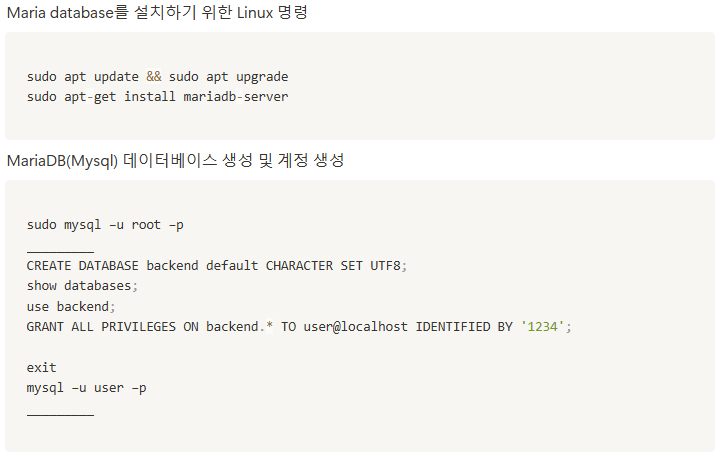

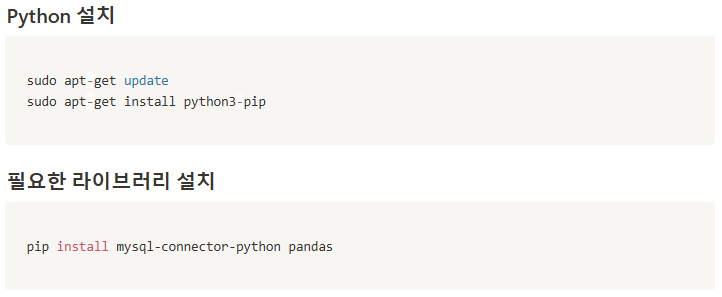

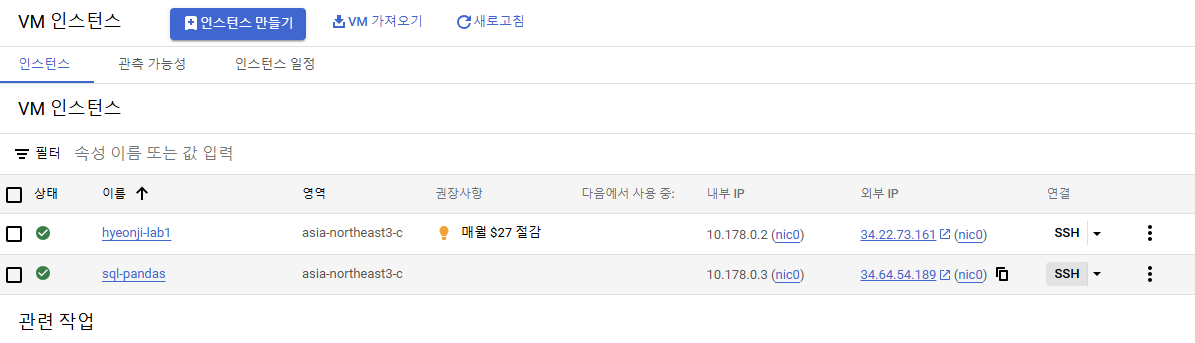

####**외부 IP 복사 후, FTP 호스트에 붙여넣기**

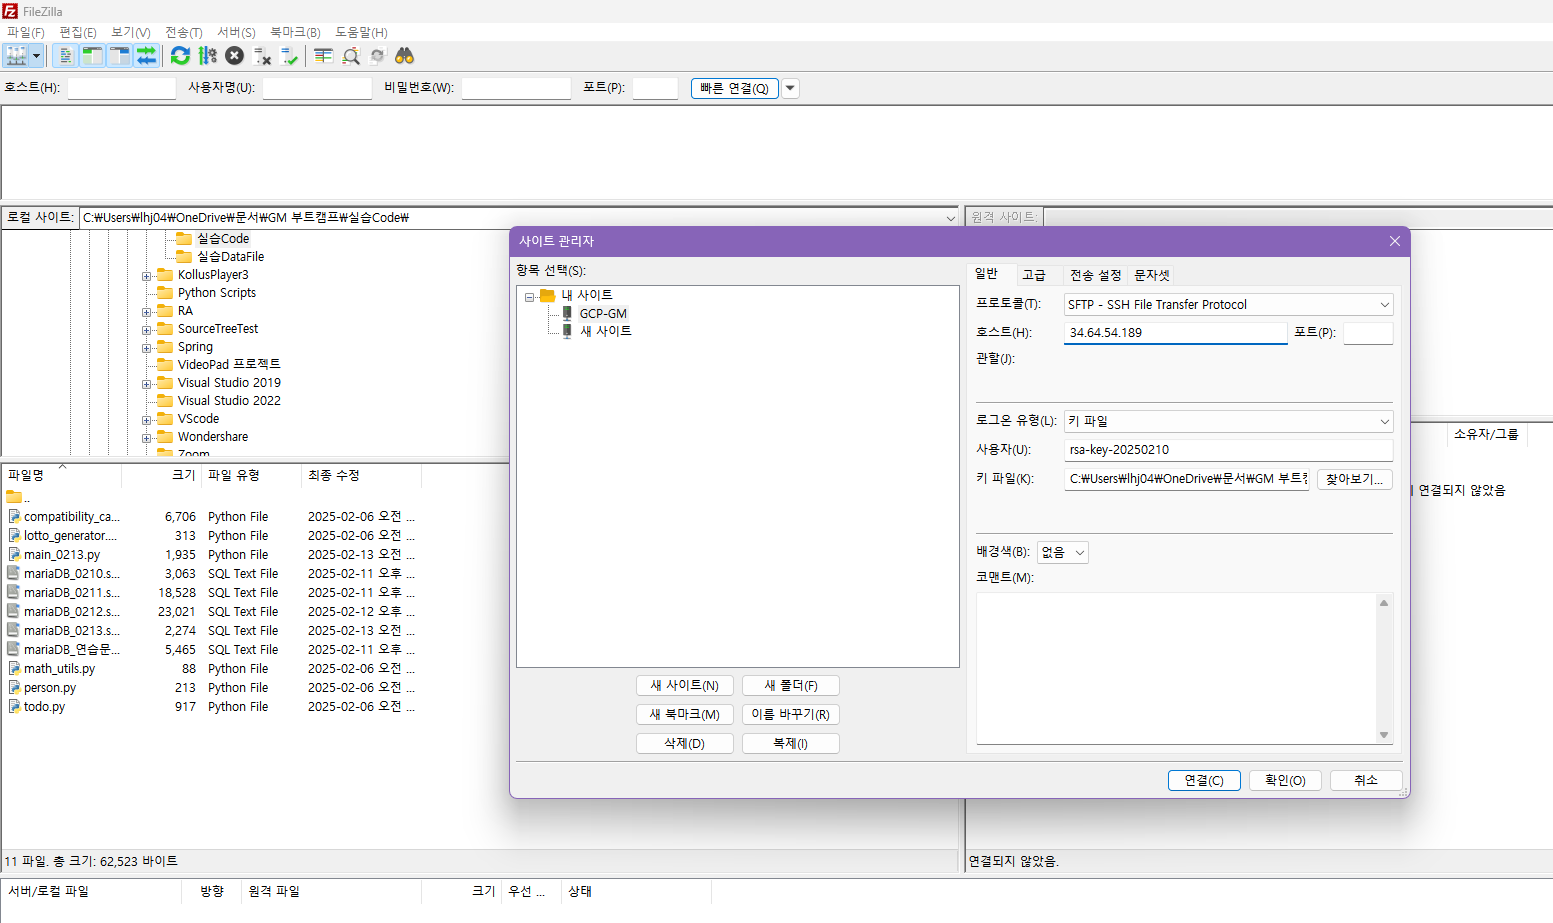

####**'main_0213.py' 만들기 ('employees' table)**

In [ ]:
import mysql.connector
import pandas as pd

# 1. MariaDB 연결 설정
db_config = {
    "host": "localhost",      # MariaDB 서버 주소
    "user": "hj",             # 사용자 이름
    "password": "1234",       # 비밀번호
    "database": "backend"     # 사용할 데이터베이스
}

# MariaDB 연결
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# 2. 테이블 생성 (이미 존재하면 삭제 후 생성)
cursor.execute("DROP TABLE IF EXISTS employees;")
cursor.execute("""
CREATE TABLE employees (
    id INT AUTO_INCREMENT PRIMARY KEY,
    name VARCHAR(50),
    age INT,
    department VARCHAR(50),
    salary DECIMAL(10,2)
);
""")

# 3. 샘플 데이터 생성 (pandas DataFrame 활용)
data = {
    "name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "age": [25, 30, 35, 28, 40],
    "department": ["HR", "IT", "Finance", "Marketing", "IT"],
    "salary": [50000, 70000, 80000, 60000, 90000]
}

df = pd.DataFrame(data)

# 4. 데이터 삽입
insert_query = "INSERT INTO employees (name, age, department, salary) VALUES (%s, %s, %s, %s)"
values = [tuple(row) for row in df.to_numpy()]

cursor.executemany(insert_query, values)
conn.commit()

print("데이터 삽입 완료")

# 5. 데이터 조회 및 pandas DataFrame으로 변환
cursor.execute("SELECT * FROM employees")
rows = cursor.fetchall()

# 컬럼명 가져오기
column_names = [desc[0] for desc in cursor.description]
df_result = pd.DataFrame(rows, columns=column_names)

# 6. 결과 출력 (pandas 기본 출력 방식 사용)
print("\n=== Employees Table Data ===")
print(df_result.to_string(index=False))  # 인덱스 없이 출력

# CSV로 저장 (필요한 경우)
df_result.to_csv("employees_data.csv", index=False, encoding="utf-8")
print("데이터를 'employees_data.csv' 파일로 저장하였습니다.")

# 연결 종료
cursor.close()
conn.close()



> 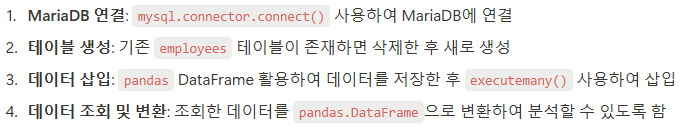



####**FTP 원격 사이트에 'main_0213.py' 넣기**

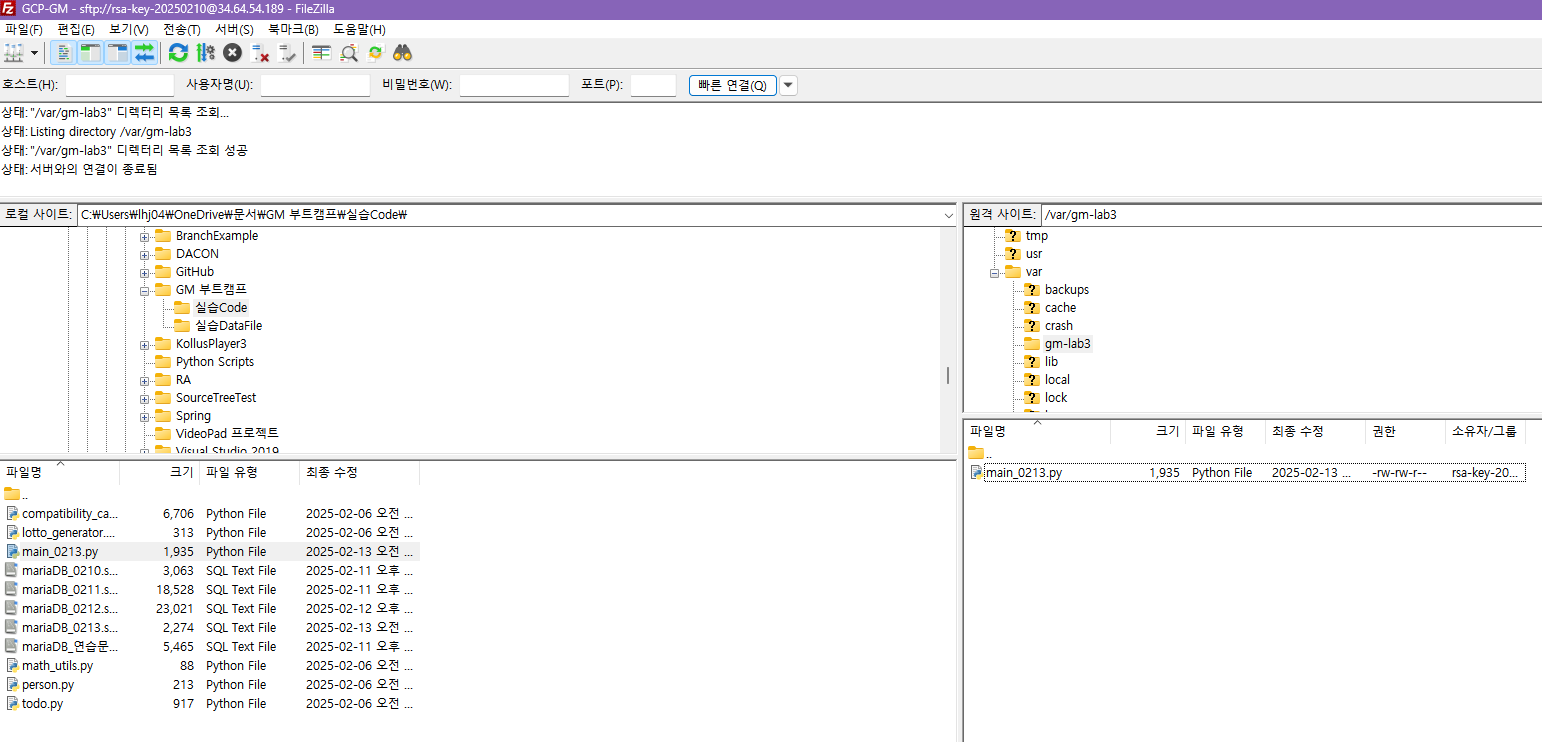

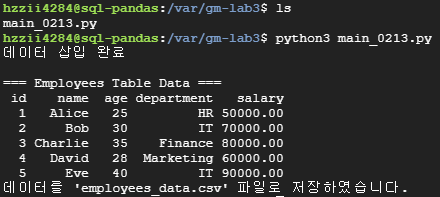

####**FTP에서 'employees_data.csv' 다운받기**

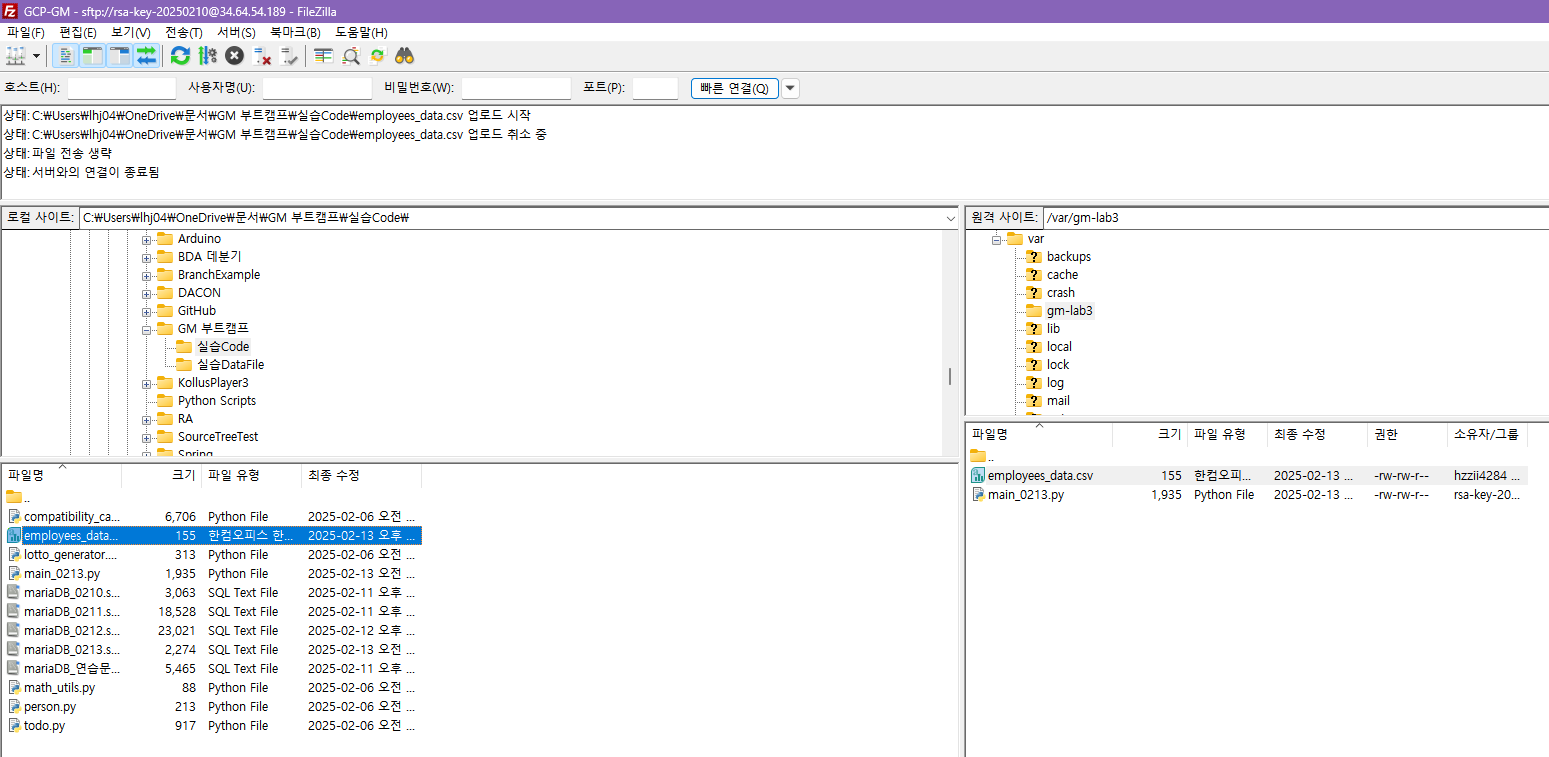

####**MariaDB에서 확인**

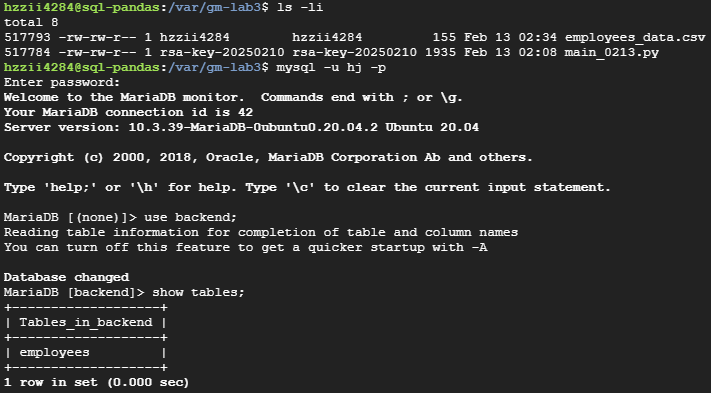  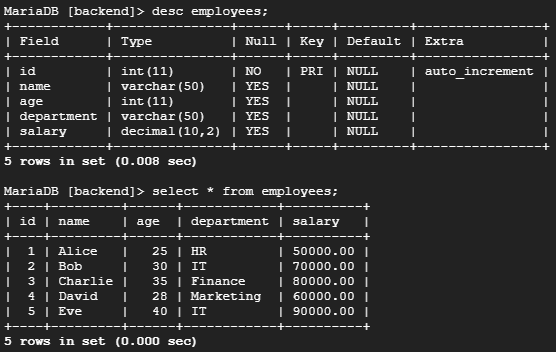



---

### 한 번 더 연습

####**'main2_0213.py' 만들기 ('growth_marketing' table)**

In [ ]:
import mysql.connector
import pandas as pd

# 1. MariaDB 연결 설정
db_config = {
    "host": "localhost",      # MariaDB 서버 주소
    "user": "hj",             # 사용자 이름
    "password": "1234",       # 비밀번호
    "database": "backend"     # 사용할 데이터베이스
}

# MariaDB 연결
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# 2. 테이블 생성 (이미 존재하면 삭제 후 생성)
cursor.execute("DROP TABLE IF EXISTS growth_marketing;")
cursor.execute("""
CREATE TABLE growth_marketing (
    id INT AUTO_INCREMENT PRIMARY KEY,
    channel VARCHAR(50),
    budget INT,
    impressions INT,
    clicks INT,
    conversions INT,
    start_date DATE DEFAULT CURRENT_DATE
);
""")

# 3. 샘플 데이터 생성 (pandas DataFrame 활용)
data = {
    "channel": ["Google Ads", "Facebook Ads", "Instagram Ads"],
    "budget": [8000000, 7000000, 6500000],
    "impressions": [300000, 250000, 230000],
    "clicks": [20000, 18000, 17000],
    "conversions": [4000, 3500, 3400],
    "start_date": ["2024-06-01", "2024-07-01", "2024-08-01"]
}

df = pd.DataFrame(data)

# 4. 데이터 삽입
insert_query = "INSERT INTO growth_marketing (channel, budget, impressions, clicks, conversions, start_date) VALUES (%s, %s, %s, %s, %s, %s)"
values = [tuple(row) for row in df.to_numpy()]

cursor.executemany(insert_query, values)
conn.commit()

print("데이터 삽입 완료")

# 5. 데이터 조회 및 pandas DataFrame으로 변환
cursor.execute("SELECT * FROM growth_marketing")
rows = cursor.fetchall()

# 컬럼명 가져오기
column_names = [desc[0] for desc in cursor.description]
df_result = pd.DataFrame(rows, columns=column_names)

# 6. 결과 출력 (pandas 기본 출력 방식 사용)
print("\n=== Growth Marketing Table Data ===")
print(df_result.to_string(index=False))  # 인덱스 없이 출력

# CSV로 저장 (필요한 경우)
df_result.to_csv("growth_marketing_data.csv", index=False, encoding="utf-8")
print("데이터를 'growth_marketing_data.csv' 파일로 저장하였습니다.")

# 연결 종료
cursor.close()
conn.close()

####**FTP 원격 사이트에 'main2_0213.py' 넣기**

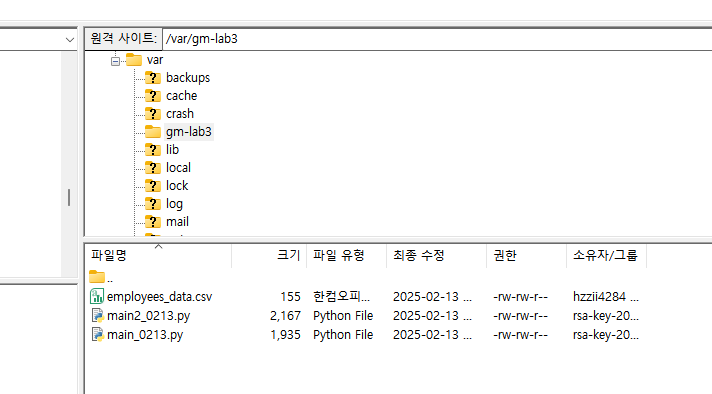

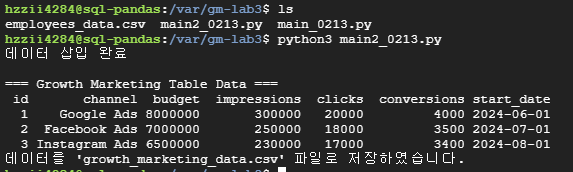

####**FTP에서 'growth_marketing.csv' 다운받기**

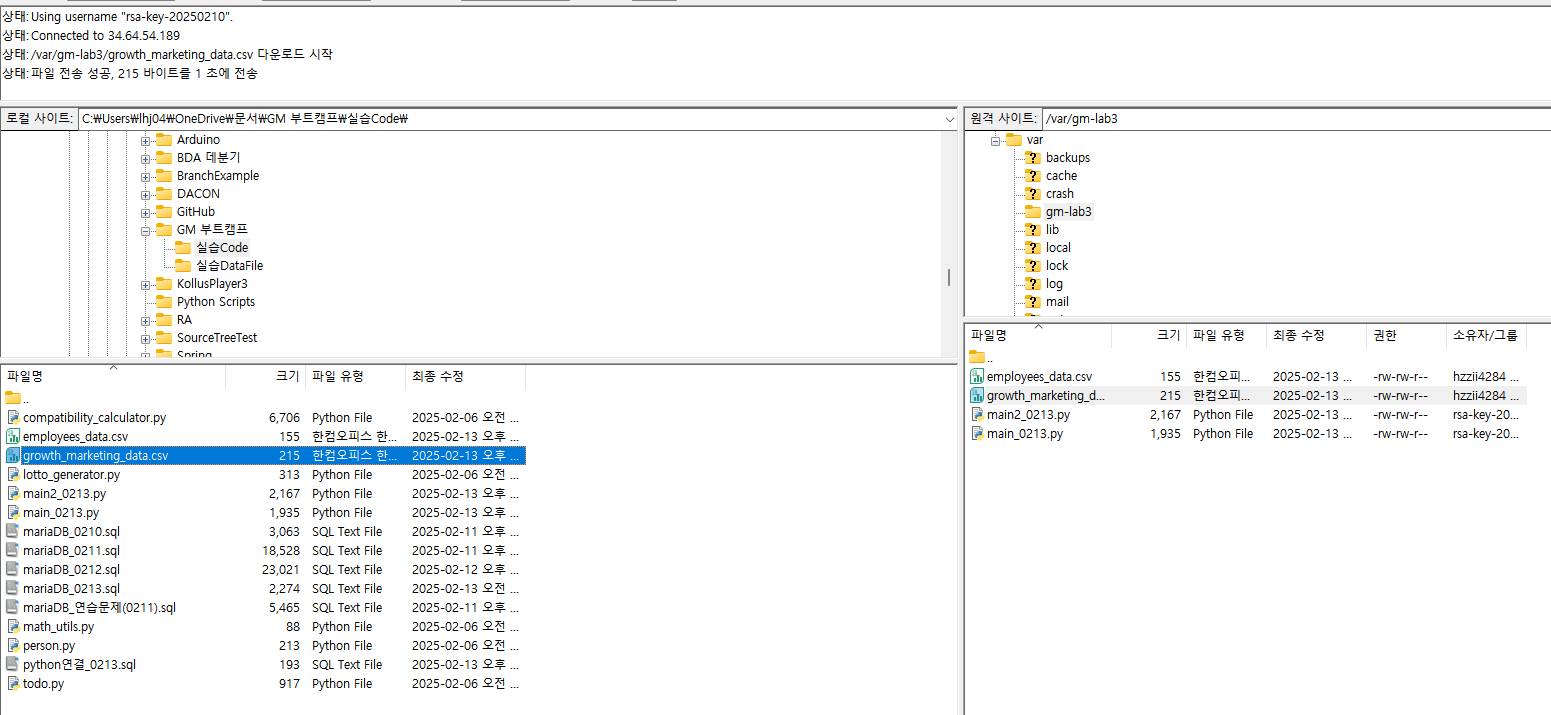

####**MariaDB에서 확인**

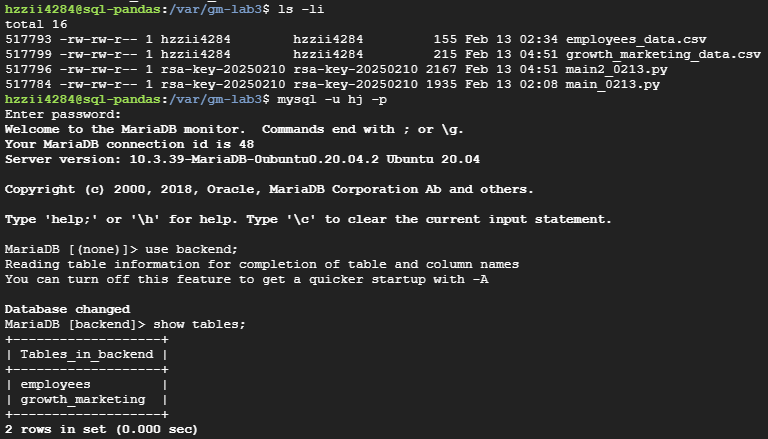  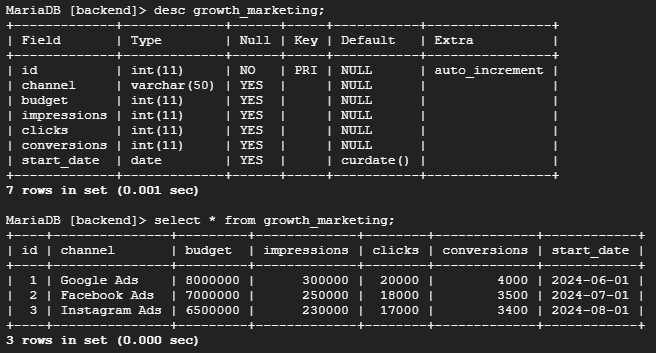